In [1]:
import sys
import ctypes

import cv2
import skimage.io as io
import skimage.transform as T
import numpy as np
from scipy.misc import face
import matplotlib.pyplot as plt
from IPython import display
from ntsc_py.nes_ntsc import NES_NTSC, PALETTE, rgb2nes, nes2rgb

In [2]:
h = NES_NTSC(mode='composite', flicker=True)

In [3]:
h.nes_pixels.dtype, h.nes_pixels.shape

(dtype('uint8'), (240, 256, 1))

In [4]:
h.ntsc_pixels.dtype, h.ntsc_pixels.shape

(dtype('uint8'), (240, 602, 3))

## NES Palette

In [5]:
imgs = []
for rgb in PALETTE:
    img = np.zeros((128, 128, 3), dtype=np.uint8)
    img[:] = rgb
    imgs.append(img)
imgs = np.array(imgs)
# convert the images to a matrix of of images
imgs = np.array(imgs).reshape((4, 16, 128, 128, 3))
# swap the axis at index 1 and 2 and concatenate
# axis 0 to combine the rows of images
imgs = np.moveaxis(imgs, 1, 2)
imgs = np.concatenate(imgs, axis=0)
# swap axis 0 with 1, then 1 with 2 and concatenate
# axis 0 to combine the columns of images
imgs = np.moveaxis(np.moveaxis(imgs, 0, 1), 1, 2)
imgs = np.concatenate(imgs, axis=0)
# transpose the image back to the normal dimensions
imgs = np.moveaxis(imgs, 0, 1)
imgs.shape

(512, 2048, 3)

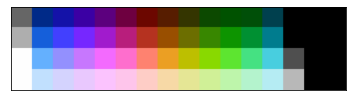

In [6]:
ax = plt.imshow(imgs)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

### Lossy Encode RGB Image

In [7]:
H, W, C = h.nes_pixels.shape

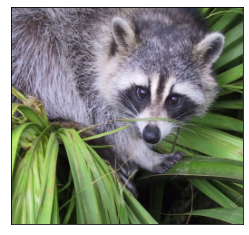

In [8]:
# img = io.imread('test.bmp')[..., :3]
img = T.resize(face(), (H, W), preserve_range=True).round().astype(int)
ax = plt.imshow(img)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

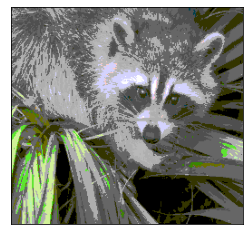

In [9]:
h.nes_pixels[:] = rgb2nes(img)
ax = plt.imshow(nes2rgb(h.nes_pixels[..., 0]))
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

## Input Buffer

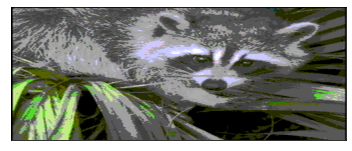

In [10]:
h.process()
ax = plt.imshow(h.ntsc_pixels)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.show()

## Process Output

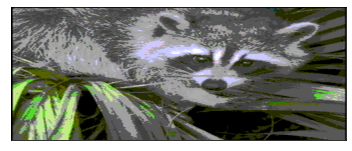

In [11]:
for i in range(60):
    h.process()
    display.clear_output(wait=True)
    ax = plt.imshow(h.ntsc_pixels)
    ax.axes.xaxis.set_major_locator(plt.NullLocator())
    ax.axes.yaxis.set_major_locator(plt.NullLocator())
    plt.show()

## Adjust Parameters

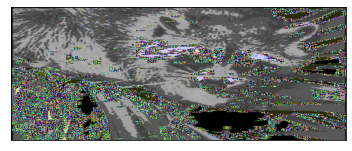

In [12]:
for i in range(60):
    h.setup(
#         hue=i/200, 
#         saturation=i/2, 
#         contrast=i, 
#         brightness=i, 
#         sharpness=i, 
#         gamma=i,
        artifacts=20 * i,
#         fringing=i,
#         bleed=i,
#         merge_fields=i,
    )
#     h.nes_pixels[:] = np.random.uniform(0, 0x3f, size=h.nes_pixels.shape)
#     # paint the NES pixels
#     cv2.putText(h.nes_pixels, 'NES', (35, 90), cv2.FONT_HERSHEY_SIMPLEX, 3, (0x3f, ), 3)
#     cv2.putText(h.nes_pixels, 'NTSC', (10, 190), cv2.FONT_HERSHEY_SIMPLEX, 3, (0x3f, ), 3)
    # step the filter
    h.process()
    display.clear_output(wait=True)
    ax = plt.imshow(h.ntsc_pixels)
    ax.axes.xaxis.set_major_locator(plt.NullLocator())
    ax.axes.yaxis.set_major_locator(plt.NullLocator())
    plt.show()

In [13]:
# del h